In [1]:
import pandas as pd
df = pd.read_csv("hippie-ppi.csv")
print(df.head())

      to   from
0  AL1A1  AL1A1
1   ITA7   ACHA
2   NEB1   ACTG
3   SRGN   CD44
4   GRB7  ERBB2


In [2]:
occur = df.groupby(['to', 'from']).size()
#print(occur)
new = df.sort_values('to', ascending = False)
print(new)

           to   from
76568    ZZZ3  KAT2A
80486    ZZZ3   EPS8
77526    ZZZ3  SGF29
160872  ZZEF1  HECD3
161799  ZZEF1  MYCBP
...       ...    ...
386258    NaN   SFPQ
386272    NaN  TRA2B
386280    NaN  PI51A
386286    NaN   ROA0
386287    NaN   ROA3

[411430 rows x 2 columns]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import random as random
random.seed(1)

In [4]:
df = pd.read_csv('hippie-ppi.csv')

In [5]:
G = nx.from_pandas_edgelist(df, 'to', 'from')

In [6]:
degree_sequence = [d for n, d in G.degree()]
degree_sequence.sort(reverse = True)
count = 0
for c in degree_sequence:
    if c == 1:
        count +=1
print(count)

1244


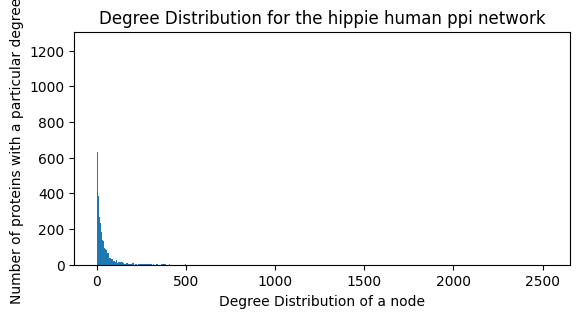

In [7]:
#Question 1a part 1

plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence)+1))
plt.xlabel('Degree Distribution of a node')
plt.ylabel('Number of proteins with a particular degree ')
plt.title('Degree Distribution for the hippie human ppi network')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

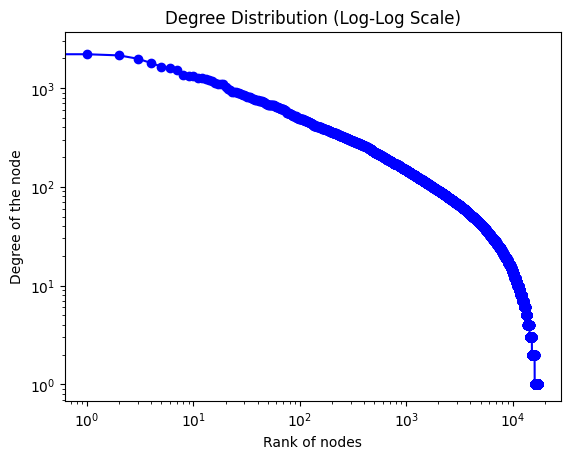

In [8]:
#Question 1a part 2

plt.loglog(sorted(degree_sequence, reverse=True), 'b-', marker='o')
plt.xlabel('Rank of nodes')
plt.ylabel('Degree of the node')
plt.title('Degree Distribution (Log-Log Scale)')
plt.show()

In [9]:
#Question 1b
node_degrees = np.array([(G.degree(e[0]), G.degree(e[1])) for e in G.edges()])
degree_assortativity = np.corrcoef(node_degrees[:, 0], node_degrees[:, 1])[0, 1]
print(degree_assortativity)


-0.05050037662470296


In [10]:
#Question 1c from here on
# Define a function to generate random networks with the same degree distribution as the original network
def generate_random_network(degree_sequence):
    G_rand = nx.configuration_model(degree_sequence)
    return G_rand

In [11]:
# Generate a large number (e.g., 5) of random networks
random.seed()
num_random_networks = 5
random_network_r_values = []
for i in range(num_random_networks):
    G_rand = generate_random_network(degree_sequence)
    r_rand = nx.degree_assortativity_coefficient(G_rand)
    random_network_r_values.append(r_rand)

# Convert the list of random network Pearson correlation coefficients to a pandas DataFrame
df2 = pd.DataFrame({'r_values': random_network_r_values})

   r_values
0 -0.001919
1 -0.003122
2 -0.001332
3 -0.004638
4 -0.000952


Text(0.5, 1.0, 'Distribution of random network Pearson correlation coefficients')

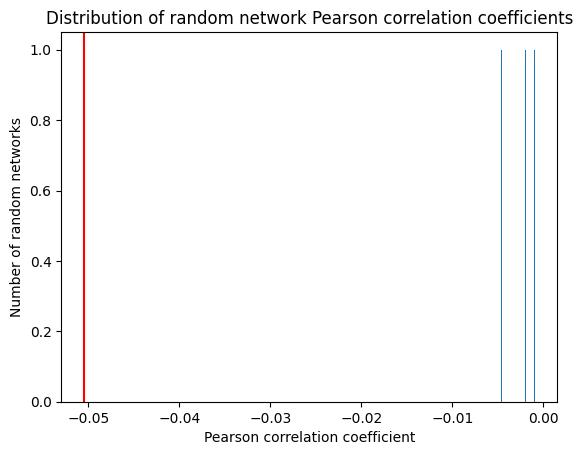

In [12]:
print(df2)
# Calculate the p-value as the fraction of random networks with a Pearson correlation coefficient greater than or equal to r
p_value = (df2['r_values'] >= degree_assortativity).mean()

# Plot the distribution of the Pearson correlation coefficients calculated for the random networks
plt.hist(df2['r_values'], bins=50)
plt.axvline(x=degree_assortativity, color='red')
plt.xlabel('Pearson correlation coefficient')
plt.ylabel('Number of random networks')
plt.title('Distribution of random network Pearson correlation coefficients')

In [13]:
# Print the p-value
print('p-value:', p_value)

# Interpret the results based on the p-value and the distribution of the random network's Pearson correlation coefficients
if p_value < 0.05:
    if degree_assortativity > 0:
        print('The network is significantly degree-assortative')
    else:
        print('The network is significantly degree-disassortative')
else:
    print('The degree assortativity of the network is not significantly different from random networks')

p-value: 1.0
The degree assortativity of the network is not significantly different from random networks


In [14]:
#Back up code for question 1a

# Load the CSV file into a pandas DataFrame
df2 = pd.read_csv("hippie-ppi.csv")

# Create a dictionary of protein node degrees
protein_degrees = dict()
for protein_1, protein_2 in zip(df2['to'], df2['from']):
    if protein_1 in protein_degrees:
        protein_degrees[protein_1] += 1
    else:
        protein_degrees[protein_1] = 1
        
    if protein_2 in protein_degrees:
        protein_degrees[protein_2] += 1
    else:
        protein_degrees[protein_2] = 1

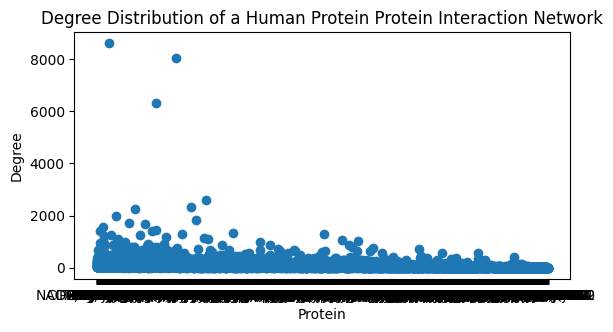

In [15]:
#Backup plot for above code
plt.scatter([str(k) for k in protein_degrees.keys()], list(protein_degrees.values()))
plt.xlabel('Protein')
plt.ylabel('Degree')
plt.title('Degree Distribution of a Human Protein Protein Interaction Network')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [16]:
#Question 2a
# Compute the PageRank centrality for each node in the graph
pagerank = nx.pagerank(G)

# Print the PageRank centrality for each node
for node, centrality in pagerank.items():
    print(f"Node: {node}, PageRank Centrality: {centrality}")

Node: AL1A1, PageRank Centrality: 1.9554336353870635e-05
Node: ITA7, PageRank Centrality: 7.832072269713554e-05
Node: ACHA, PageRank Centrality: 1.926766217941314e-05
Node: NEB1, PageRank Centrality: 5.208840944034823e-05
Node: ACTG, PageRank Centrality: 0.00025887962134879013
Node: SRGN, PageRank Centrality: 3.4101231708189695e-05
Node: CD44, PageRank Centrality: 0.00017619126121880968
Node: GRB7, PageRank Centrality: 6.346656839343825e-05
Node: ERBB2, PageRank Centrality: 0.0004108776769315282
Node: PAK1, PageRank Centrality: 0.00020784843027787532
Node: DLG4, PageRank Centrality: 0.000194746663224182
Node: P85B, PageRank Centrality: 0.00023288658102149927
Node: PTN18, PageRank Centrality: 6.554024611425342e-05
Node: LAP2, PageRank Centrality: 0.00016302868956029521
Node: SMUF2, PageRank Centrality: 0.00021192190805452454
Node: RHG05, PageRank Centrality: 3.3634732481349e-05
Node: MERL, PageRank Centrality: 0.00027951799786611267
Node: CD82, PageRank Centrality: 5.5401030867740235e-0

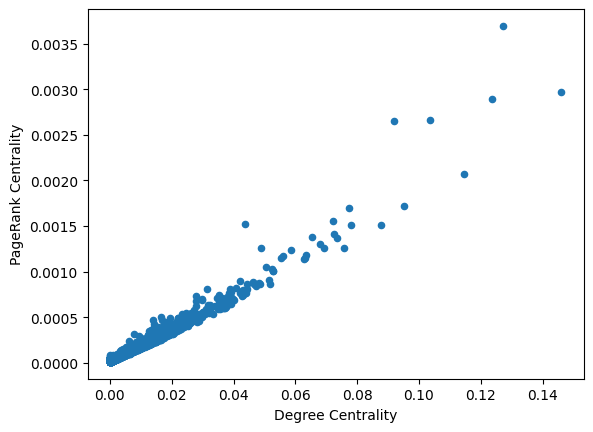

In [17]:
#Question 2a
# Compute the degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Combine the degree and PageRank centralities into a single dataframe
centralities = pd.DataFrame({
    "degree": [degree_centrality[node] for node in G.nodes()],
    "pagerank": [pagerank[node] for node in G.nodes()]
})

# Plot the degree and PageRank centralities
centralities.plot.scatter(x="degree", y="pagerank")
plt.xlabel("Degree Centrality")
plt.ylabel("PageRank Centrality")
plt.show()

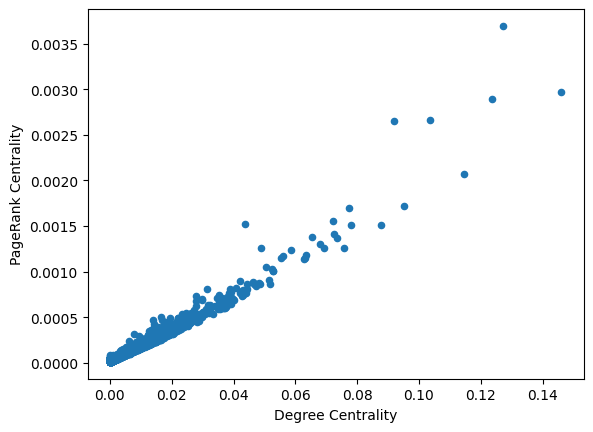

In [18]:
#Question 2a part 2
damping_factor = 0.85
pagerank = nx.pagerank(G, alpha=damping_factor)

centralities = pd.DataFrame({
    "degree": [degree_centrality[node] for node in G.nodes()],
    "pagerank": [pagerank[node] for node in G.nodes()]
})

# Plot the degree and PageRank centralities
centralities.plot.scatter(x="degree", y="pagerank")
plt.xlabel("Degree Centrality")
plt.ylabel("PageRank Centrality")
plt.show()

In [19]:
#Question 2a part 2 multiple damping factors
#Damping factor parameter to tune in the rate of the restarts
damping_factors = [0.15, 0.7, 0.9, 0.99]

for damping_factor in damping_factors:
    pagerank = nx.pagerank(G, alpha=damping_factor)
    print(f"Damping factor: {damping_factor}")
    for node, centrality in pagerank.items():
        print(f"Node: {node}, PageRank Centrality: {centrality}")
    print("\n")

Damping factor: 0.15
Node: AL1A1, PageRank Centrality: 5.203639940192137e-05
Node: ITA7, PageRank Centrality: 6.0514047616568475e-05
Node: ACHA, PageRank Centrality: 5.389511712089025e-05
Node: NEB1, PageRank Centrality: 5.455660166559282e-05
Node: ACTG, PageRank Centrality: 8.525471337525217e-05
Node: SRGN, PageRank Centrality: 5.319416953881477e-05
Node: CD44, PageRank Centrality: 7.629183735549194e-05
Node: GRB7, PageRank Centrality: 5.965352592205896e-05
Node: ERBB2, PageRank Centrality: 0.00012061562216577479
Node: PAK1, PageRank Centrality: 8.737863436313466e-05
Node: DLG4, PageRank Centrality: 9.524334283032493e-05
Node: P85B, PageRank Centrality: 7.856196998544644e-05
Node: PTN18, PageRank Centrality: 5.884244556692497e-05
Node: LAP2, PageRank Centrality: 8.663294958879153e-05
Node: SMUF2, PageRank Centrality: 8.674033488917357e-05
Node: RHG05, PageRank Centrality: 5.2473140577993755e-05
Node: MERL, PageRank Centrality: 8.944067347057037e-05
Node: CD82, PageRank Centrality: 5.8

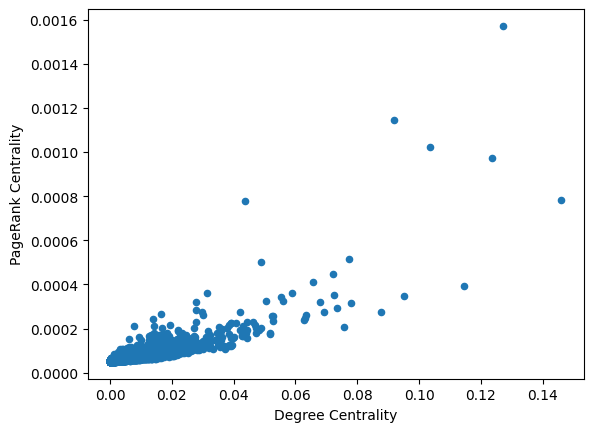

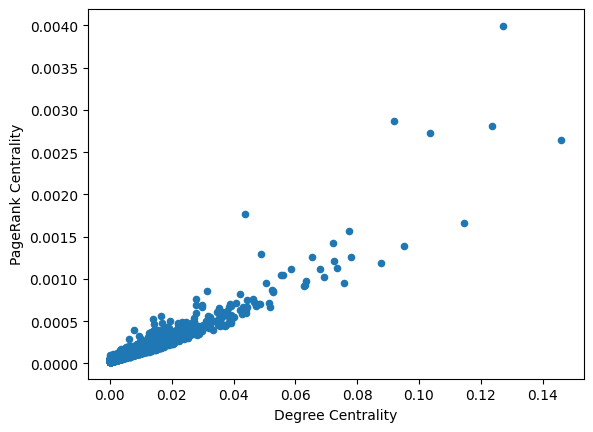

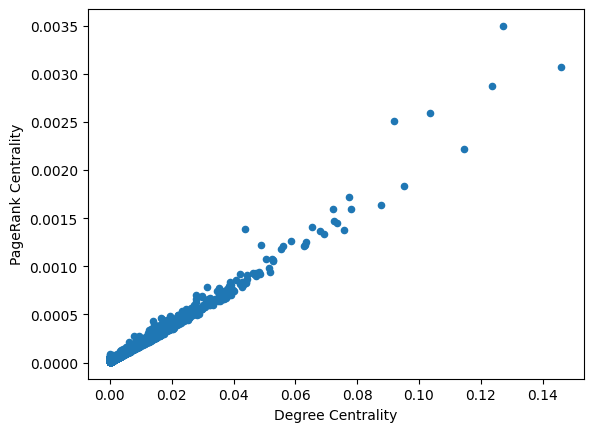

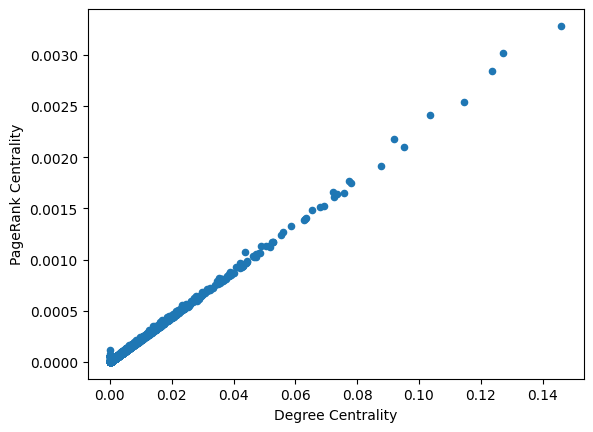

In [20]:
#Question 2a plots for code above

#Damping factor parameter to tune in the rate of the restarts
damping_factors = [0.15, 0.7, 0.9, 0.99]

for damping_factor in damping_factors:
    pagerank = nx.pagerank(G, alpha=damping_factor)
    centralities = pd.DataFrame({
    "degree": [degree_centrality[node] for node in G.nodes()],
    "pagerank": [pagerank[node] for node in G.nodes()]
})
    # Plot the degree and PageRank centralities for each of the damping factors from the array above
    centralities.plot.scatter(x="degree", y="pagerank")
    plt.xlabel("Degree Centrality")
    plt.ylabel("PageRank Centrality")
    plt.show()
    

In [21]:
#Question 2b and 2c from here on

# Compute the degree centrality for each node
degree_centrality = nx.degree_centrality(G)
degree_centrality = dict(degree_centrality)

# Compute the PageRank centrality for each node with a damping factor of 0.85
pagerank = nx.pagerank(G, alpha=0.85, tol=1e-6)
pagerank = dict(pagerank)

# Combine the degree and PageRank centralities into a single dataframe
centralities = pd.DataFrame({
    "degree": [degree_centrality[node] for node in G.nodes()],
    "pagerank": [pagerank[node] for node in G.nodes()]
})

# Compute the median degree centrality and PageRank centrality
median_degree_centrality = centralities["degree"].median()
median_pagerank_centrality = centralities["pagerank"].median()


In [22]:
# Categorize the nodes based on their degree and PageRank centralities
categories = []
for node in G.nodes():
    degree = degree_centrality[node]
    pagerank1 = pagerank[node]
    if degree > median_degree_centrality and pagerank1 > median_pagerank_centrality:
        categories.append("HD-HP")
    elif degree > median_degree_centrality and pagerank1 < median_pagerank_centrality:
        categories.append("HD-LP")
    elif degree < median_degree_centrality and pagerank1 > median_pagerank_centrality:
        categories.append("LD-HP")
    else:
        categories.append("LD-LP")

In [23]:
# Add the node categories to the dataframe
centralities["category"] = categories

In [24]:
print(median_degree_centrality)
print(median_pagerank_centrality)
print(centralities[1200:1220])

0.0010960484568791464
3.162243118664945e-05
        degree  pagerank category
1200  0.001846  0.000042    HD-HP
1201  0.000635  0.000024    LD-LP
1202  0.000865  0.000029    LD-LP
1203  0.004846  0.000104    HD-HP
1204  0.009922  0.000175    HD-HP
1205  0.000577  0.000020    LD-LP
1206  0.001269  0.000034    HD-HP
1207  0.003634  0.000075    HD-HP
1208  0.003057  0.000062    HD-HP
1209  0.007384  0.000131    HD-HP
1210  0.001846  0.000054    HD-HP
1211  0.000981  0.000028    LD-LP
1212  0.034035  0.000623    HD-HP
1213  0.000058  0.000010    LD-LP
1214  0.001904  0.000047    HD-HP
1215  0.002250  0.000049    HD-HP
1216  0.001615  0.000043    HD-HP
1217  0.007961  0.000143    HD-HP
1218  0.008768  0.000167    HD-HP
1219  0.002077  0.000048    HD-HP
